In [18]:
#from ava_functions import *

In [19]:
## rigettando anche sulla base del ppp

In [20]:
#import os
#os.chdir('../../../Desktop/Criticality in barrel cortex')

In [21]:
#from power import *
##from powerlaw_fit import *
#from stats import *
import matplotlib.cm as cm
cmap = cm.tab10

In [22]:
#from ava_functions import *

In [23]:
## rigettando anche sulla base del ppp

In [24]:
#import os
#os.chdir('../../../Desktop/Criticality in barrel cortex')

In [25]:
def x_autocorr_sm_ext(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    y_random = np.zeros((nrep,N+1))
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

        ## randomize
        np.random.shuffle(x_data_i)
        y_random[i_nrep,:] =  acf(x_data_i,fft=True,nlags=N)#[1:]


    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)

    y_mu_rand = np.mean(y_random,axis=0)
    y_1_rand,y_2_rand = np.percentile(y_random,q=q,axis=0)

    result = {}
    result['tau'] = x
    result['C'] = [y_mu,y_1,y_2]
    result['C_rand'] = [y_mu_rand,y_1_rand,y_2_rand]
    result['tmp'] = [y_original,y_random]
    return result

In [26]:
#from power import *
##from powerlaw_fit import *
#from stats import *
import matplotlib.cm as cm
cmap = cm.tab10

In [27]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [29]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [15]:
##  diceva di controllare time scales david poeppel

In [31]:
from dfa_functions import *

In [34]:
DFA_1 =[[] for i in range(len(good_sub))]
DFA_2 =[[] for i in range(len(good_sub))]
o = 0
for i, subj in enumerate(subjs):
    dfa_sil_params = [[] for r in range(len(bands)-1)]
    dfa_sil2_params = [[] for r in range(len(bands)-1)]
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    data2 = s2['eeg_rest'].astype('float')
    print(subj,data.shape[1]/500, data2.shape[1]/500)

5 180.286 188.766
6 180.236 188.316
9 180.27 189.194
11 180.272 189.74
12 180.322 189.458
13 180.288 188.45
16 180.32 189.32
17 180.238 186.714
18 180.274 187.092
19 180.278 189.276
21 180.284 188.636
23 180.266 189.13
24 180.25 190.528
25 180.324 187.892
30 180.288 189.442
33 180.246 194.122
34 180.25 188.17
35 180.354 188.032
37 180.246 188.344
39 180.322 190.292
40 180.33 188.484
45 180.274 189.766
47 180.262 207.378
49 180.32 201.342
52 180.286 208.028
53 180.29 90.598
56 180.258 189.098
57 180.264 188.76
58 180.25 189.528
60 180.15 192.734
62 180.288 208.422
63 180.298 200.088
65 180.294 189.378
66 180.27 192.518
67 180.278 191.454
68 180.338 190.718
69 180.288 190.558
71 180.294 200.258
14 180.222 187.464
20 180.25 188.85
22 180.306 187.944
27 180.268 187.53
28 180.298 186.792
29 180.338 154.954
31 180.28 189.89
41 180.234 190.122
46 180.284 210.666
64 180.27 191.812
70 180.298 198.828


In [5]:
from statsmodels.tsa.stattools import acf
def x_autocorr_sm(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y = acf(x_data,fft=True,nlags=N)
    
    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

    
    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)
    result = {}
    result['tau'] = x
    result['C'] = np.array([y_mu,y_1,y_2])
    return result

In [6]:
def plot_corr(x, y_mu, y_1,y_2, y_mu_rand, y_1_rand,y_2_rand, tau_star):
    plt.rcParams['font.size'] = 18
    fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)
    lw = 2
    alpha_val = .5
    ## Plot the empirical autocorrelation
    x_ = x
    y_ = y_mu
    z1_ = y_1
    z2_ = y_2
    c_ = cmap(0)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



    ## Plot the randomized autocorrelation
    x_ = x
    y_ = y_mu_rand
    z1_ = y_1_rand
    z2_ = y_2_rand
    c_ = cmap(1)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


    ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


    ## Layout stuff
    ax.legend(loc='upper right')

    ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.set_xlabel(r'Time Lag, $\tau$')#,labelpad=0)
    ax.set_ylabel(r'$C(\tau)$')
    ax.set_ylim(-0.1,0.3)


    x_annot_tau = 0.8
    y_annot_tau = 0.6
    ax.annotate(r'$\tau^*=%s$'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction')

In [7]:
def x_autocorr_sm_ext(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    y_random = np.zeros((nrep,N+1))
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

        ## randomize
        np.random.shuffle(x_data_i)
        y_random[i_nrep,:] =  acf(x_data_i,fft=True,nlags=N)#[1:]


    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)

    y_mu_rand = np.mean(y_random,axis=0)
    y_1_rand,y_2_rand = np.percentile(y_random,q=q,axis=0)

    result = {}
    result['tau'] = x
    result['C'] = [y_mu,y_1,y_2]
    result['C_rand'] = [y_mu_rand,y_1_rand,y_2_rand]
    result['tmp'] = [y_original,y_random]
    return result

In [8]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [9]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def autocorr_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    ## non ho diviso per la sd
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T
    

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]

    #S_shape_ = np.zeros((N))
    #for ch in range(spikes.shape[1]):
    #    S_shape_ += spikes[:,ch]
    #where_spikes = np.where(S_shape_ != 0)
    #interspike_time = (where_spikes - np.roll(where_spikes,1))
    #interspike_time = np.delete(interspike_time,0) # remove the first element
    #mean_interspike_time = np.sum(interspike_time)/len(interspike_time)
    #mean_interspike_time = int(round(mean_interspike_time))
    #mean_interspike_time
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    
    
    v = x_autocorr_sm(new)  


    return v['C'], v['tau']

In [10]:
def calculate_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    return new

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [21]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [13]:
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [15]:
import scipy.io
import scipy.signal
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf, ccf
def monoExp(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return a*(np.exp(-t/tau) - 1) + 1


def monoExp2(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return -(a*(np.exp(-t/tau) - 1) +1)

def fit_envelope_autocorr(data, delta_t = 0.002):
    """
    Fit the exponential envelope of the autocorrelation function.

    Parameters
    ----------
    autocorr : numpy.ndarray
        Autocorrelation functions. Each row is the autocorrelation
        for a given channel.
    delta_t : float, optional
        Sampling time of the experimental signals.
        The default is 0.002s.

    Returns
    -------
    tcorr : numpy.ndarray
        Autocorrelation times for each channel.
    """

    maxima = argrelextrema(data, np.greater, order = 100)[0]
    minima = argrelextrema(data, np.less, order = 100)[0]

    x_to_fit = np.insert(maxima,0,0)
    g = data[maxima]
    y_to_fit = np.insert(g,0,1)
    params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
    #print(params_max)
    

    
    x_to_fit = np.insert(minima,0,0)
    g = data[minima]
    y_to_fit = np.insert(g,0,-1)
    params_min, _ = curve_fit(monoExp2, x_to_fit, y_to_fit, (250, 1))
    #print(params_min)
    
    tcorr = (params_max[0] + params_min[0])/2*delta_t
            
    return tcorr
#params_max[0]*delta_t


In [ ]:
np.insert(np.array([1,2,3]),0,0)

## EEg autocorrelations

In [16]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
## you can discard subjec t 23 and 24

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up

In [11]:
##  diceva di controllare time scales david poeppel

'C:\\Users\\Benedetta\\Downloads\\NewbornEEGData-20220203T094950Z-001\\NewbornEEGData'

In [206]:
good_sub

[5, 6, 9]

In [143]:
tau1s = [[] for i in range(len(good_sub))]
tau2s = [[] for i in range(len(good_sub))]
interv = 10
o = 0
#good_sub = []
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        #good_sub.append(subj)
        #print(subj, data.shape[1]/500,data2.shape[1]/500)
        
        for l in range(data.shape[0]):
            #print('doing')
            res = x_autocorr_sm(data[l])
            sig = res['C'][0]
            tau1 = fit_envelope_autocorr(sig)
            tau1s[o].append(tau1)
            
            #print(len(c))
            
        for l in range(data2.shape[0]):

            res = x_autocorr_sm(data2[l])
            sig = res['C'][0]
            tau2 = fit_envelope_autocorr(sig)
            tau2s[o].append(tau2)
        o+=1
    #break

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\1710546669.py:24: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1
C:\Users\Benedetta\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


7.162315670363384


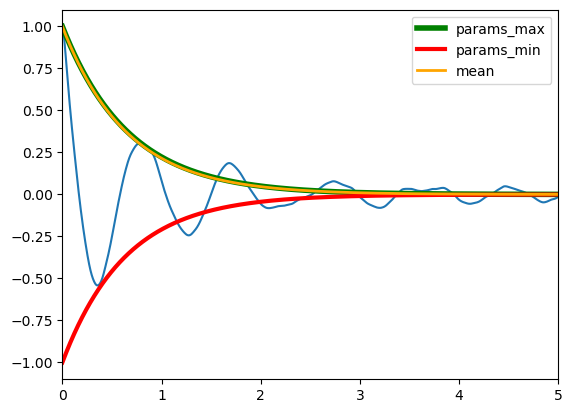

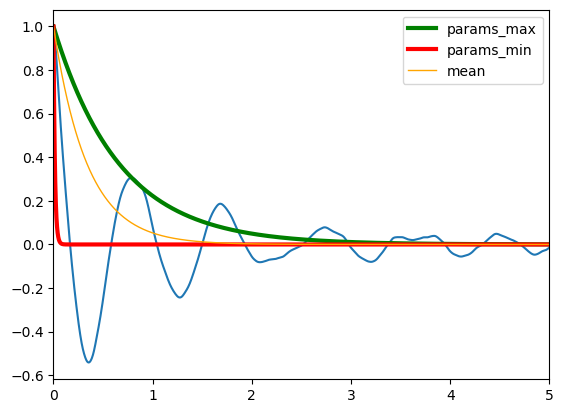

In [144]:
delta_t = 0.002
sig = res['C'][0]

maxima = argrelextrema(sig, np.greater, order = 100)[0]
minima = argrelextrema(sig, np.less, order = 100)[0]

x_to_fit = np.insert(maxima,0,0)
g = sig[maxima]
y_to_fit = np.insert(g,0,1)
params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
#print(params_max)



x_to_fit = np.insert(minima,0,0)
g = sig[minima]
y_to_fit = np.insert(g,0,-1)

params_min, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
params_min_try, _ = curve_fit(monoExp2, x_to_fit, y_to_fit, (250, 1))


t = np.arange(0,len(sig),1)/500
plt.plot(t,sig)

plt.plot(t,monoExp(t,params_max[0]*delta_t,1), color ='green',label ='params_max', lw = 4)

plt.plot(t,monoExp2(t,params_min_try[0]*delta_t,1), color ='red', label ='params_min', lw = 3)

final_estimate = (params_max[0] + params_min_try[0])/2
plt.plot(t,monoExp(t,final_estimate*delta_t,1), color ='orange', label ='mean', lw = 2)


plt.legend()
plt.xlim(0,5);
#par

plt.figure()

t = np.arange(0,len(sig),1)/500
plt.plot(t,sig)

plt.plot(t,monoExp(t,params_max[0]*delta_t,1), color ='green',label ='params_max', lw = 3)

plt.plot(t,monoExp(t,params_min[0]*delta_t,1), color ='red', label ='params_min', lw = 3)
print(params_min[0])
final_estimate = (params_max[0] + params_min[0])/2
plt.plot(t,monoExp(t,final_estimate*delta_t,1), color ='orange', label ='mean', lw = 1)


plt.legend()
plt.xlim(0,5);
#par

In [145]:
good_sub = np.asarray(good_sub, dtype = int)
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    a

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [37]:
data.shape

(0, 90149)

In [38]:

#res = x_autocorr_sm(data2[l])
sig = res['C'][0]
tau2 = fit_envelope_autocorr(sig)

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\3755065530.py:24: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1
C:\Users\Benedetta\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [41]:
tau2

0.34567683692820383

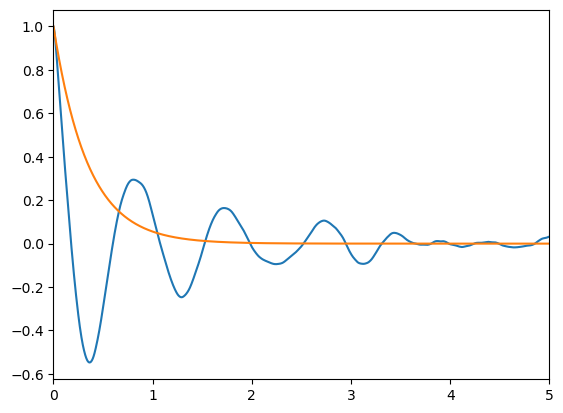

In [50]:
t = np.arange(0,len(sig),1)/500
plt.plot(t,sig)

plt.plot(t,monoExp(t,tau2,1))
plt.xlim(0,5);

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\1929512027.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau1s = np.asarray(tau1s)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\1929512027.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau2s = np.asarray(tau2s)


In [146]:
tau1s = np.asarray(tau1s)
tau2s = np.asarray(tau2s)
t1_frenc = funct2(sub_fren, tau1s)
t1_span = funct2(sub_span, tau1s)
t1_en= funct2(sub_en, tau1s)

t2_frenc = funct2(sub_fren, tau2s)
t2_span = funct2(sub_span, tau2s)
t2_en= funct2(sub_en, tau2s)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ##

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\2724904959.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau1s = np.asarray(tau1s)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\2724904959.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau2s = np.asarray(tau2s)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\2724904959.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [147]:
tau1s.shape

(32,)

0.6518467247826393


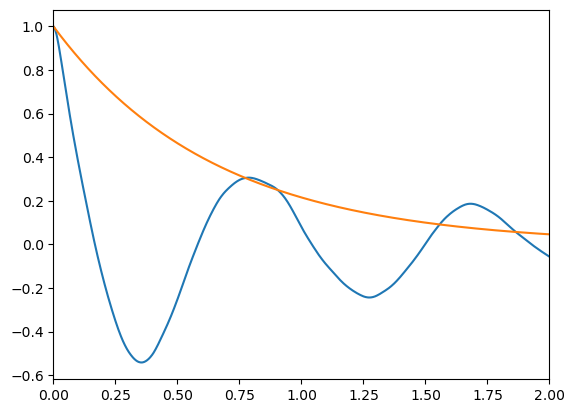

In [148]:
#res = x_autocorr_sm(data[3])

sig = res['C'][0]
a  = fit_envelope_autocorr(sig)
print(a)

plt.plot(res['tau']/500,sig)
plt.xlim(0,2)
plt.plot(res['tau']/500,monoExp(res['tau']/500,a,1))
#plt.plot(res['tau']/500,monoExp(res['tau']/500,334.08297222*0.002,1), color ='red')
#plt.plot(res['tau']/500,monoExp2(res['tau']/500,215.52017319*0.002,1.), color ='green')

In [104]:
tau2s[-1],a

([0.5045182879586426,
  0.5406231017370774,
  0.6149436924324635,
  0.5960143705301081,
  0.6048625154120507,
  0.6616441811572604,
  0.564120115819771,
  0.5507857227261725,
  0.4663517702295171,
  0.6947544160333028],
 0.6947544160333028)

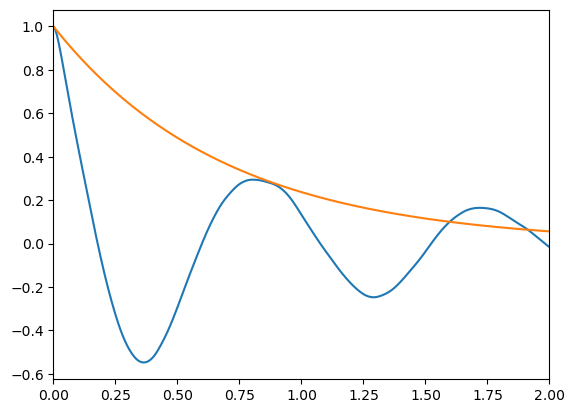

In [106]:
plt.plot(res['tau']/500,sig)
plt.xlim(0,2)
plt.plot(res['tau']/500,monoExp(res['tau']/500,tau2s[-1][-1],1))

In [149]:
a = 0
for i in t1_frenc:
    a+= len(i)
print(a)

#a = 0
for i in t2_frenc:
    a+= len(i)
a

113


221

In [150]:
o = 0
df_fren = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,221,1), dtype = 'float')
for j in range(len(t1_frenc)):
    ntrial = len(t1_frenc[j])
    for r in range(ntrial):
        df_fren.iloc[o]["tau_c"] = float(t1_frenc[j][r])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_frenc)):
    ntrial = len(t2_frenc[j])
    for r in range(ntrial):
        df_fren.iloc[o]["tau_c"] = float(t2_frenc[j][r])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_fren["Silence"] = ["1" for r in range(113) ]+ ["2" for r in range(108)]


221


In [ ]:
t

In [151]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)


76
164 88


In [152]:
a = 0
for i in tau1s:
    a+= len(i)
print(a)
c = a
#a = 0
for i in tau2s:
    a+= len(i)
print(a, a-c)

278
574 296


In [153]:
o = 0
df_total = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,574,1), dtype = 'float')
for j in range(len(tau1s)):
    ntrial = len(tau1s[j])
    for r in range(ntrial):
        df_total.iloc[o]["tau_c"] = float(tau1s[j][r])
        df_total.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
        df_total.iloc[o]["ch"] = int(r)
        o+=1
        
for j in range(len(tau2s)):
    ntrial = len(tau2s[j])
    for r in range(ntrial):
        df_total.iloc[o]["tau_c"] = float(tau2s[j][r])
        df_total.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
        df_total.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_total["Silence"] = ["1" for r in range(278) ]+ ["2" for r in range(296)]

574


In [48]:
32*10*2, #missing values

640

In [154]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_total, groups=df_total["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      574         Method:                 REML    
No. Groups:            32          Scale:                  0.0142  
Min. group size:       14          Log-Likelihood:         322.6618
Max. group size:       20          Converged:              Yes     
Mean group size:       17.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.497    0.020 24.344 0.000  0.457  0.537
Silence[T.2]              0.010    0.032  0.307 0.759 -0.054  0.073
Group Var                 0.012    0.029                           
Group x Silence[T.2] Cov -0.008    0.035                           
Silence[T.2] Var          0.030    0.074                       

In [155]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)

76
164 88


In [156]:
o = 0
df_span = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,164,1), dtype = 'float')
for j in range(len(t1_span)):
    ntrial = len(t1_span[j])
    for r in range(ntrial):
        df_span.iloc[o]["tau_c"] = float(t1_span[j][r])
        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_span)):
    ntrial = len(t2_span[j])
    for r in range(ntrial):
        df_span.iloc[o]["tau_c"] = float(t2_span[j][r])
        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_span["Silence"] = ["1" for r in range(76) ]+ ["2" for r in range(88)]


164


In [157]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      221         Method:                 REML    
No. Groups:            12          Scale:                  0.0157  
Min. group size:       16          Log-Likelihood:         114.6004
Max. group size:       20          Converged:              Yes     
Mean group size:       18.4                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.450    0.032 14.076 0.000  0.387  0.513
Silence[T.2]              0.051    0.049  1.056 0.291 -0.044  0.147
Group Var                 0.011    0.043                           
Group x Silence[T.2] Cov -0.007    0.050                           
Silence[T.2] Var          0.025    0.100                       

In [158]:
a = 0
for i in t1_en:
    a+= len(i)
print(a)

#a = 0
for i in t2_en:
    a+= len(i)
a

89


189

In [159]:
o = 0
df_en = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,189,1), dtype = 'float')
for j in range(len(t1_en)):
    ntrial = len(t1_en[j])
    for r in range(ntrial):
        df_en.iloc[o]["tau_c"] = float(t1_en[j][r])
        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_en)):
    ntrial = len(t2_en[j])
    for r in range(ntrial):
        df_en.iloc[o]["tau_c"] = float(t2_en[j][r])
        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_en["Silence"] = ["1" for r in range(89) ]+ ["2" for r in range(100)]


189


In [162]:
df_fren.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_fren_2ndmeth.csv", index = True)
df_span.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_span_2ndmeth.csv", index = True)
df_en.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_en_2ndmeth.csv", index = True)

In [331]:
pd.read_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/fren.csv", index_col = 0)

Silence     tau_c  sub_id   ch
0          1  0.542652    66.0  0.0
1          1  0.518412    66.0  1.0
2          1  0.424604    66.0  2.0
3          1  0.371044    66.0  3.0
4          1  0.370191    66.0  4.0
..       ...       ...     ...  ...
216        2  0.487911    56.0  4.0
217        2  0.448473    56.0  5.0
218        2  0.477559    56.0  6.0
219        2  0.503569    56.0  7.0
220        2  0.534939    56.0  8.0

[221 rows x 4 columns]

In [160]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_span, groups=df_span["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     tau_c  
No. Observations:       164         Method:                 REML   
No. Groups:             9           Scale:                  0.0164 
Min. group size:        16          Log-Likelihood:         78.6003
Max. group size:        20          Converged:              Yes    
Mean group size:        18.2                                       
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.515    0.030 16.923 0.000  0.456  0.575
Silence[T.2]              0.045    0.083  0.541 0.589 -0.118  0.209
Group Var                 0.006    0.033                           
Group x Silence[T.2] Cov -0.004    0.066                           
Silence[T.2] Var          0.059    0.252                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [161]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_en, groups=df_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      189         Method:                 REML    
No. Groups:            11          Scale:                  0.0105  
Min. group size:       14          Log-Likelihood:         134.3195
Max. group size:       20          Converged:              Yes     
Mean group size:       17.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.535    0.040 13.492 0.000  0.458  0.613
Silence[T.2]             -0.066    0.034 -1.926 0.054 -0.133  0.001
Group Var                 0.016    0.078                           
Group x Silence[T.2] Cov -0.009    0.056                           
Silence[T.2] Var          0.010    0.057                       

In [263]:
df_en

Silence     tau_c  sub_id   ch
0         1  0.709435    33.0  0.0
1         1  0.682107    33.0  1.0
2         1  0.710066    33.0  2.0
3         1  0.644199    33.0  3.0
4         1  0.824240    33.0  4.0
..      ...       ...     ...  ...
184       2  0.525882    30.0  3.0
185       2  0.485663    30.0  4.0
186       2  0.487494    30.0  5.0
187       2  0.411766    30.0  6.0
188       2  0.692988    30.0  7.0

[189 rows x 4 columns]

In [264]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      189         Method:                 REML    
No. Groups:            11          Scale:                  0.0093  
Min. group size:       14          Log-Likelihood:         144.7897
Max. group size:       20          Converged:              Yes     
Mean group size:       17.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.594    0.037 15.964 0.000  0.521  0.667
Silence[T.2]             -0.053    0.035 -1.496 0.135 -0.122  0.016
Group Var                 0.014    0.073                           
Group x Silence[T.2] Cov -0.008    0.057                           
Silence[T.2] Var          0.011    0.065                       

In [20]:
len(good_sub)

1

In [40]:
##CALCULATE TAUS
nrep = 10
q1,q2 = 1,99
#taustar1 = []
#taustar2 = []
theta = 2
taustar1 = [[] for i in range(len(good_sub))]
taustar2 = [[] for i in range(len(good_sub))]
interv = 10
#good_sub = []
o = 0
indice = 3
flagf, flage,flags = False,False,False
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan2 = data2.shape[0]
    #if o ==0: flagf, flage,flags = True, True, True
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        #good_sub.append(subj)
        #print('doing')
        
        
                    
        fl1 =( np.array(data)-np.mean(np.array(data),1)[:,np.newaxis])/(np.std(np.array(data),1)[:,np.newaxis])
        ## non ho diviso per la sd
    
        fl1 = np.asarray(fl1)
        spikes =np.array( [np.array(np.abs(fl1[i,:]) > theta, dtype=float) for i in range(len(fl1))], dtype =int)
        #new1 = calculate_events(data.T,2,interv)
        #new2 = calculate_events(data2.T,2,interv)
        

            
        for l in range(data.shape[0]):

            result = x_autocorr_sm_ext(np.log(spikes[l] + 0.0001),nrep=nrep,q=[q1,q2])
            x = result['tau']*1000*interv*1/500
            y_mu,y_1,y_2 = result['C']
            y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
            ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
            tau_star = x[ind_t_star]
            taustar1[o].append(tau_star)
            
        fl2 =( np.array(data2)-np.mean(np.array(data2),1)[:,np.newaxis])/(np.std(np.array(data2),1)[:,np.newaxis])
        ## non ho diviso per la sd
        
        fl2 = np.asarray(fl2)
        print(fl2.shape)
        spikes =np.array( [np.array(np.abs(fl2[i,:]) > theta, dtype=float) for i in range(len(fl2))], dtype =int)
        
            #print(len(c))
        for l in range(data2.shape[0]):
            
            result = x_autocorr_sm_ext(np.log(spikes[l] + 0.0001),nrep=nrep,q=[q1,q2])
            x = result['tau']*1000*interv*1/500
            y_mu,y_1,y_2 = result['C']
            y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
            ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
            tau_star = x[ind_t_star]
            taustar2[o].append(tau_star)

           
        

        #result = x_autocorr_sm_ext(np.log(new1 + 0.0001),nrep=nrep,q=[q1,q2])
        #x = result['tau']*1000*interv*1/500
        #y_mu,y_1,y_2 = result['C']
        #y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        #ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        #tau_star = x[ind_t_star]
        #taustar1.append(tau_star)

        if subj in sub_fren and flagf:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After French example silence 1')
            
            #flagf = False

        if subj in sub_en and flage:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After english example silence 1')
            
            #flage = False 
            
        if subj in sub_span and flags:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After spanish example silence 1')
            
            #flags = False
        o+=1

        #result = x_autocorr_sm_ext(np.log(new2+ 0.0001),nrep=nrep,q=[q1,q2])
        #x = result['tau']*1000*interv*1/500
        #y_mu,y_1,y_2 = result['C']
        #y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        #ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        #tau_star = x[ind_t_star]
        #taustar2.append(tau_star) ##one tau for each subjectn, number of events
 

5 142.926 142.926
(10, 71463)
6 142.926 142.926
(10, 71463)
9 142.926 142.926
(10, 71463)
11 142.926 142.926
(10, 71463)
12 142.926 142.926
(7, 71463)
16 142.926 142.926
(10, 71463)
17 142.926 142.926
(10, 71463)
18 142.926 142.926
(9, 71463)
19 142.926 142.926
(10, 71463)
23 142.926 142.926
(10, 71463)
30 142.926 142.926
(8, 71463)
33 142.926 142.926
(9, 71463)
35 142.926 142.926
(10, 71463)
37 142.926 142.926
(10, 71463)
40 142.926 142.926
(8, 71463)
45 142.926 142.926
(9, 71463)
47 142.926 142.926
(7, 71463)
49 142.926 142.926
(8, 71463)
52 142.926 142.926
(10, 71463)
56 142.926 142.926
(9, 71463)
58 142.926 142.926
(9, 71463)
62 142.926 142.926
(9, 71463)
66 142.926 142.926
(10, 71463)
67 142.926 142.926
(9, 71463)
68 142.926 142.926
(9, 71463)
71 142.926 142.926
(10, 71463)
14 142.926 142.926
(10, 71463)
22 142.926 142.926
(8, 71463)
27 142.926 142.926
(9, 71463)
41 142.926 142.926
(9, 71463)
46 142.926 142.926
(10, 71463)
64 142.926 142.926
(10, 71463)


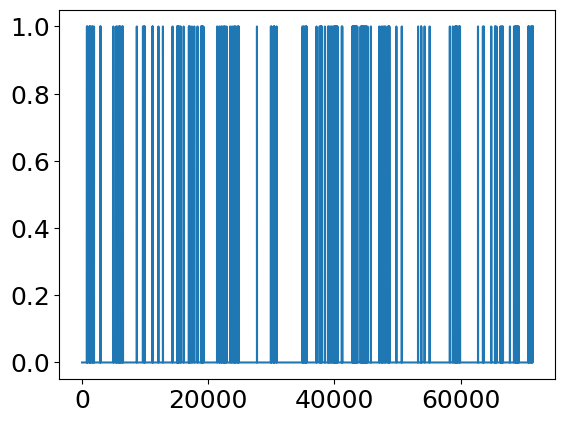

In [62]:
plt.plot(spikes[0])

Text(0.5, 1.0, 'After spanish example silence 1')

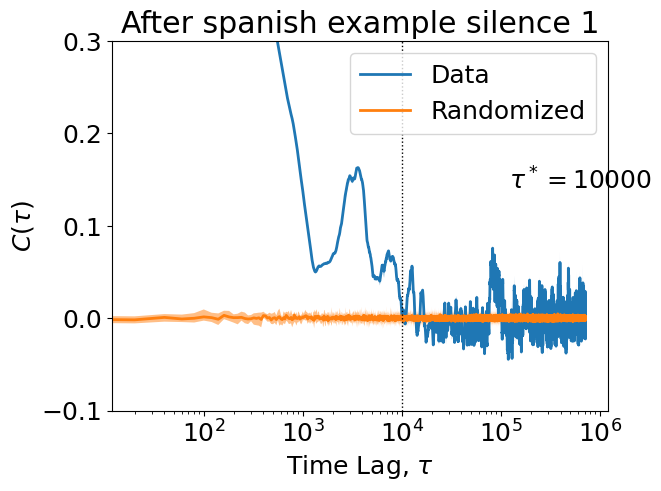

In [60]:
plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
plt.title('After spanish example silence 1')

In [52]:
taustar2[0]

[56520.0,
 109720.0,
 99060.0,
 108760.0,
 113220.0,
 39560.0,
 100260.0,
 66100.0,
 106960.0,
 103840.0]

In [39]:
len(taustar1[0])

32

In [41]:
taustar1 = np.asarray(taustar1)
taustar2 = np.asarray(taustar2)
t1_frenc = funct2(sub_fren, taustar1)
t1_span = funct2(sub_span, taustar1)
t1_en= funct2(sub_en, taustar1)

t2_frenc = funct2(sub_fren, taustar2)
t2_span = funct2(sub_span, taustar2)
t2_en= funct2(sub_en, taustar2)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ##

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_4052\3036725587.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  taustar1 = np.asarray(taustar1)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_4052\3036725587.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  taustar2 = np.asarray(taustar2)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_4052\3036725587.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

In [42]:
a = 0
for i in t1_frenc:
    a+= len(i)
print(a)

#a = 0
for i in t2_frenc:
    a+= len(i)
a

113


221

In [43]:
o = 0
df_fren = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,221,1), dtype = 'float')
for j in range(len(t1_frenc)):
    ntrial = len(t1_frenc[j])
    for r in range(ntrial):
        df_fren.iloc[o]["tau_c"] = float(t1_frenc[j][r])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_frenc)):
    ntrial = len(t2_frenc[j])
    for r in range(ntrial):
        df_fren.iloc[o]["tau_c"] = float(t2_frenc[j][r])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_fren["Silence"] = ["1" for r in range(113) ]+ ["2" for r in range(108)]


221


In [ ]:
t

In [44]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)


76
164 88


In [46]:
a = 0
for i in taustar1:
    a+= len(i)
print(a)
c = a
#a = 0
for i in taustar2:
    a+= len(i)
print(a, a-c)

278
574 296


In [48]:
o = 0
df_total = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,574,1), dtype = 'float')
for j in range(len(taustar1)):
    ntrial = len(taustar1[j])
    for r in range(ntrial):
        df_total.iloc[o]["tau_c"] = float(taustar1[j][r])
        df_total.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
        df_total.iloc[o]["ch"] = int(r)
        o+=1
        
for j in range(len(taustar2)):
    ntrial = len(taustar2[j])
    for r in range(ntrial):
        df_total.iloc[o]["tau_c"] = float(taustar2[j][r])
        df_total.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
        df_total.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_total["Silence"] = ["1" for r in range(278) ]+ ["2" for r in range(296)]

574


In [48]:
32*10*2, #missing values

640

In [49]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_total, groups=df_total["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                      Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        tau_c         
No. Observations:        574            Method:                    REML          
No. Groups:              32             Scale:                     196610944.6336
Min. group size:         14             Log-Likelihood:            -6372.4362    
Max. group size:         20             Converged:                 Yes           
Mean group size:         17.9                                                    
---------------------------------------------------------------------------------
                             Coef.       Std.Err.   z   P>|z|   [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                     24363.954  3349.616 7.274 0.000 17798.828 30929.080
Silence[T.2]                   1599.811  4402.283 0.363 0.716 -7028.505 10228.128
Group Var                 335717732.81

In [53]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)

76
164 88


In [54]:
o = 0
df_span = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,164,1), dtype = 'float')
for j in range(len(t1_span)):
    ntrial = len(t1_span[j])
    for r in range(ntrial):
        df_span.iloc[o]["tau_c"] = float(t1_span[j][r])
        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_span)):
    ntrial = len(t2_span[j])
    for r in range(ntrial):
        df_span.iloc[o]["tau_c"] = float(t2_span[j][r])
        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_span["Silence"] = ["1" for r in range(76) ]+ ["2" for r in range(88)]


164


In [55]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                     Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       tau_c         
No. Observations:         221           Method:                   REML          
No. Groups:               12            Scale:                    263731357.1808
Min. group size:          16            Log-Likelihood:           -2466.7524    
Max. group size:          20            Converged:                Yes           
Mean group size:          18.4                                                  
--------------------------------------------------------------------------------
                             Coef.      Std.Err.   z   P>|z|   [0.025    0.975] 
--------------------------------------------------------------------------------
Intercept                    22840.174  4967.356 4.598 0.000 13104.336 32576.012
Silence[T.2]                 10551.618  6812.524 1.549 0.121 -2800.683 23903.919
Group Var                267940662.557  8012.862  

In [56]:
a = 0
for i in t1_en:
    a+= len(i)
print(a)

#a = 0
for i in t2_en:
    a+= len(i)
a

89


189

In [260]:
t2_en

array([list([0.7363133585155948, 0.8592948579378674, 0.6938118812465229, 0.5842257538454678, 0.5928964025017948, 0.8523598473437626, 0.5153557436615919, 0.5881134909109074, 0.7017291694239536]),
       list([0.5235418791702242, 0.5546760268430453, 0.5972709541545643, 0.6131689536121694, 0.4955461324709076, 0.5051952494989397, 0.5574184175011068, 0.5790647753941097, 0.7952961791663307]),
       list([0.618969413746437, 0.4992729492016069, 0.5271787220652886, 0.5483700949197896, 0.5271529048613867, 0.5473258004994379, 0.4985770185968542, 0.47484630779503767, 0.5052810760378468, 0.5653522164637659]),
       list([1.1606476833874064, 1.0338559417121567, 0.6202727563093128, 0.6226446357933653, 0.6183102387605235, 0.7906323237904707, 0.757251751168687, 0.5997985057413574, 0.5890112970563515, 0.6497917257419661]),
       list([0.3105176880234816, 0.39786605504730965, 0.40224149265858117, 0.40772848179107285, 0.3655684494818396, 0.364867703503172, 0.43913660184616865, 0.3988039603635505]),
   

In [57]:
o = 0
df_en = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,189,1), dtype = 'float')
for j in range(len(t1_en)):
    ntrial = len(t1_en[j])
    for r in range(ntrial):
        df_en.iloc[o]["tau_c"] = float(t1_en[j][r])
        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_en)):
    ntrial = len(t2_en[j])
    for r in range(ntrial):
        df_en.iloc[o]["tau_c"] = float(t2_en[j][r])
        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_en["Silence"] = ["1" for r in range(89) ]+ ["2" for r in range(100)]


189


In [67]:
import seaborn as sns

In [ ]:
df_en['tau_c'][df_en['Silence']=="1"]

<Axes: xlabel='Silence', ylabel='tau_c'>

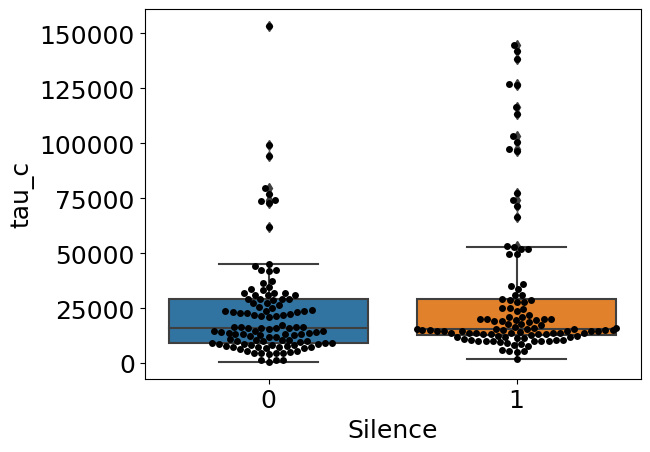

In [85]:
sns.boxplot([df_fren['tau_c'][df_fren['Silence']=="1"],df_fren['tau_c'][df_fren['Silence']=="2"] ])
sns.swarmplot(df_fren ,x ="Silence", y = 'tau_c', color ='black')


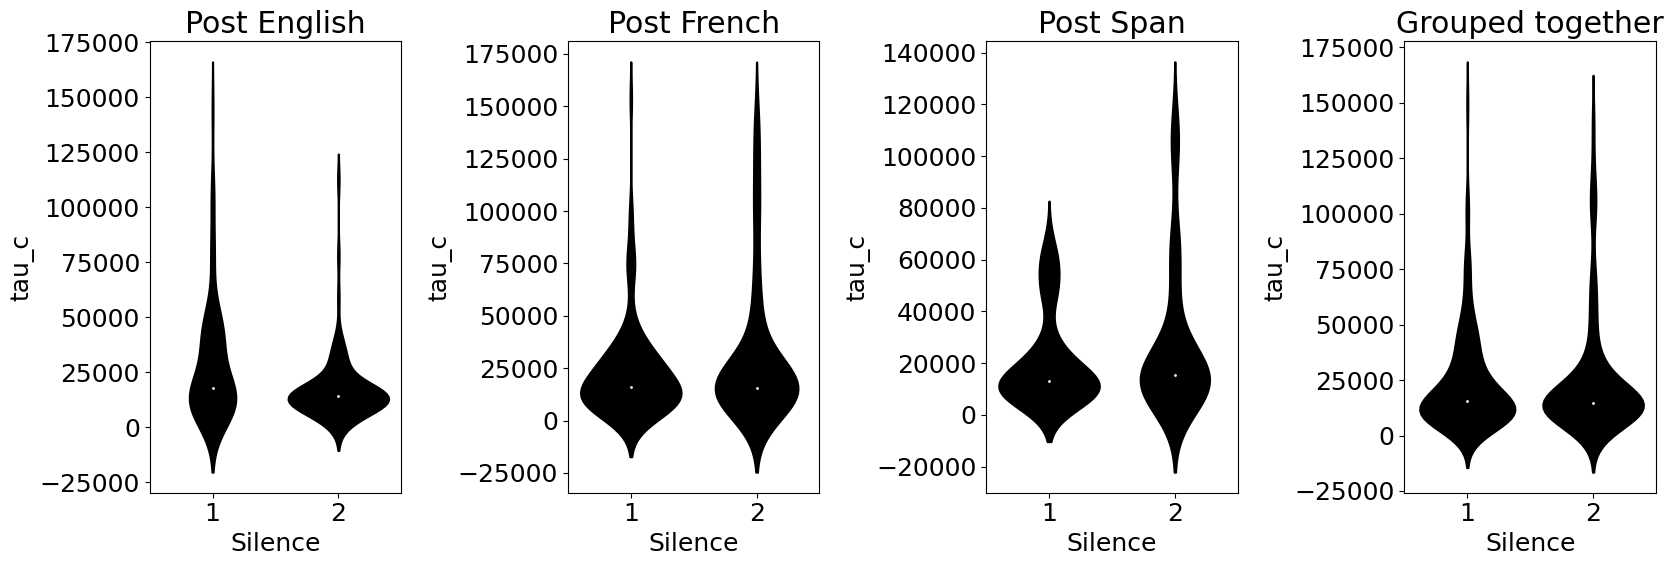

In [95]:
#sns.boxplot(df_span,x ="Silence", y = 'tau_c')
f,ax = plt.subplots(1,4, figsize =(17,6))
sns.violinplot(df_en ,x ="Silence", y = 'tau_c', color ='black',ax = ax[0]);
ax[0].set_title('Post English')



sns.violinplot(df_fren,x ="Silence", y = 'tau_c', color ='black',ax = ax[1]);
ax[1].set_title('Post French')



sns.violinplot(df_span ,x ="Silence", y = 'tau_c', color ='black',ax = ax[2]);
ax[2].set_title('Post Span')



sns.violinplot(df_total ,x ="Silence", y = 'tau_c', color ='black',ax = ax[3]);
ax[3].set_title('Grouped together');
plt.tight_layout()

In [ ]:
## correlazione delle fluttuazioni, e io lo ho fatto banda per banda..........

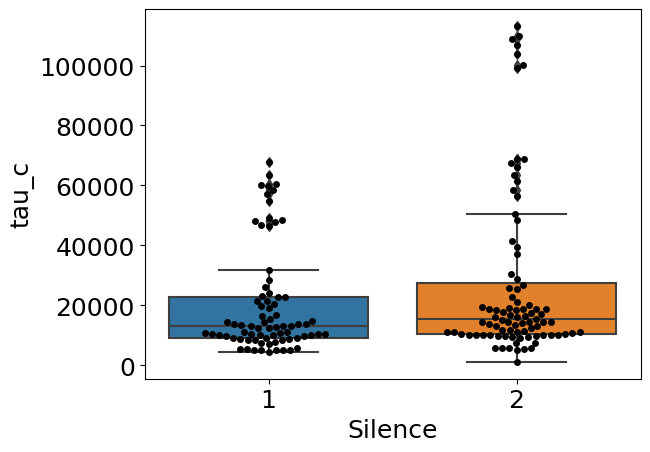

In [88]:
sns.boxplot(df_span,x ="Silence", y = 'tau_c')
sns.swarmplot(df_span ,x ="Silence", y = 'tau_c', color ='black');


In [58]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_span, groups=df_span["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                      Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        tau_c         
No. Observations:        164            Method:                    REML          
No. Groups:              9              Scale:                     138191368.9431
Min. group size:         16             Log-Likelihood:            -1777.7477    
Max. group size:         20             Converged:                 Yes           
Mean group size:         18.2                                                    
---------------------------------------------------------------------------------
                             Coef.      Std.Err.   z   P>|z|   [0.025     0.975] 
---------------------------------------------------------------------------------
Intercept                    20154.443  4316.859 4.669 0.000  11693.554 28615.331
Silence[T.2]                  6890.374  9619.882 0.716 0.474 -11964.248 25744.996
Group Var                151056654.704

In [94]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_en, groups=df_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                       Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        tau_c         
No. Observations:          189            Method:                    REML          
No. Groups:                11             Scale:                     167840607.0938
Min. group size:           14             Log-Likelihood:            -2062.0311    
Max. group size:           20             Converged:                 Yes           
Mean group size:           17.2                                                    
-----------------------------------------------------------------------------------
                             Coef.       Std.Err.   z    P>|z|   [0.025     0.975] 
-----------------------------------------------------------------------------------
Intercept                     29670.528  7513.201  3.949 0.000  14944.924 44396.132
Silence[T.2]                 -12644.813  5392.769 -2.345 0.019 -23214.445 -2075.180
Group Var      

In [ ]:
## just one value per subject

In [125]:
taustar1= np.asarray(taustar1)
taustar2= np.asarray(taustar2)

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [126]:
t1_frenc = funct2(sub_fren, taustar1)
t1_span = funct2(sub_span, taustar1)
t1_en= funct2(sub_en, taustar1)

t2_frenc = funct2(sub_fren, taustar2)
t2_span = funct2(sub_span, taustar2)
t2_en= funct2(sub_en, taustar2)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\4287316683.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([t1_frenc, t1_span, t1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16304\4287316683.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english


In [127]:
good_sub = np.asarray(good_sub)

In [128]:

t2_en

o = 0
df_en = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id' ],  index = np.arange(0,22,1), dtype = 'float')
for j in range(len(t1_en)):
    
    #ntrial = len(t1_en[j])
    
    #for r in range(ntrial):
       
    df_en.iloc[o]["tau_c"] = float(t1_en[j])

    df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
        
        
for j in range(len(t2_en)):
    
    #ntrial = len(t2_en[j])
    
    #for r in range(ntrial):
       
    df_en.iloc[o]["tau_c"] = float(t2_en[j])

    df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
print(o)
df_en["Silence"] = ["1" for r in range(11) ]+ ["2" for r in range(11)]


22


In [129]:
df_fren = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id' ],  index = np.arange(0,24,1), dtype = 'float')

In [130]:

t2_en

o = 0
for j in range(len(t1_frenc)):
    
    #ntrial = len(t1_en[j])
    
    #for r in range(ntrial):
       
    df_fren.iloc[o]["tau_c"] = float(t1_frenc[j])

    df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
        
        
for j in range(len(t2_frenc)):
    
    #ntrial = len(t2_en[j])
    
    #for r in range(ntrial):
       
    df_fren.iloc[o]["tau_c"] = float(t2_frenc[j])

    df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
print(o)
df_fren["Silence"] = ["1" for r in range(12) ]+ ["2" for r in range(12)]


24


In [141]:
df_span = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id' ],  index = np.arange(0,18,1), dtype = 'float')


t2_en

o = 0
for j in range(len(t1_span)):
    
    #ntrial = len(t1_en[j])
    
    #for r in range(ntrial):
       
    df_span.iloc[o]["tau_c"] = float(t1_span[j])

    df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
        
print(o)
        
for j in range(len(t2_span)):
    
    #ntrial = len(t2_en[j])
    
    #for r in range(ntrial):
       
    df_span.iloc[o]["tau_c"] = float(t2_span[j])

    df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
print(o)
df_span["Silence"] = ["1" for r in range(9) ]+ ["2" for r in range(9)]


9
18


In [132]:
from scipy import stats
stats.ttest_rel(df_fren["tau_c"][df_fren["Silence"]=="1"],df_fren["tau_c"][df_fren["Silence"]=="2"], alternative ='less')

TtestResult(statistic=-0.5764262028422062, pvalue=0.28796597660462087, df=11)

In [133]:
stats.ttest_rel(df_en["tau_c"][df_en["Silence"]=="1"],df_en["tau_c"][df_en["Silence"]=="2"], alternative ='greater')

TtestResult(statistic=1.6187745436388803, pvalue=0.06828269734540388, df=10)

In [142]:
stats.ttest_rel(df_span["tau_c"][df_span["Silence"]=="1"],df_span["tau_c"][df_span["Silence"]=="2"], alternative ='less')

TtestResult(statistic=0.7836585398278193, pvalue=0.7720934602920995, df=8)

In [134]:
import scipy.stats as stats 
import statsmodels.api as sm
md = smf.ols("tau_c ~Silence", data = df_fren ,)
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tau_c   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2744
Date:                Thu, 16 May 2024   Prob (F-statistic):              0.606
Time:                        20:09:45   Log-Likelihood:                -243.83
No. Observations:                  24   AIC:                             491.7
Df Residuals:                      22   BIC:                             494.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5258.3333   1885.418      2.789      0.011    1348.215    9168.451
Silence[T.2]  1396.6667   2666.384      0.524      0.606   -4133.075    6926.409
==============================================================================
Omnibus:                       16.487   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.732
Skew:                           1.768   Prob(JB):                     0.000233
Kurtosis:                       5.058   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
import scipy.stats as stats 

stats.ttest_ind(t2_en[:], t2_frenc[:11],alternative = 'less')
### comunque la statitìstica è poca

Ttest_indResult(statistic=-1.8266209110339209, pvalue=0.04136086126942943)

In [313]:
import scipy.stats as stats 

stats.ttest_rel(t1_frenc, t2_frenc,alternative = 'less')

TtestResult(statistic=-0.5622793723175931, pvalue=0.2926007615074494, df=11)

In [251]:
import scipy.stats as stats 

stats.ttest_rel(t1_span, t2_span,alternative = 'less')

TtestResult(statistic=0.7846233564994731, pvalue=0.7723608236816174, df=8)

In [282]:
import scipy.stats as stats 

stats.ttest_rel(t1_en, t2_en, alternative = 'greater')

TtestResult(statistic=1.2080650160523068, pvalue=0.12740772526048091, df=10)

In [283]:
len(t1_en)

11